In [ ]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

---

## Data Exploration

### Reading the `housing.csv` data into a Pandas DataFrame.

In [ ]:
# Read the CSV file
housing_df = pd.read_csv("housing.csv")

# Review the DataFrame
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Review the information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#Review the columns
housing_df.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [ ]:
#Reviewing the data dtypes
housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Feature Engineering

In [ ]:
housing_df['pop_density'] = housing_df['population'] / (housing_df['latitude'] * housing_df['longitude'])

In [ ]:
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']

In [ ]:
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']

In [ ]:
# Age of Housing Stock (categorizing into bins)
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']
housing_df['age_of_housing_stock'] = pd.cut(housing_df['housing_median_age'], bins=bins, labels=labels)

In [ ]:
# Interaction Terms
housing_df['income_times_age'] = housing_df['median_income'] * housing_df['housing_median_age']

In [ ]:
# Median Income Categories
income_bins = [0, 3, 6, 9, 12, float('inf')]
income_labels = ['Low', 'Lower Middle', 'Middle', 'Upper Middle', 'High']
housing_df['income_category'] = pd.cut(housing_df['median_income'], bins=income_bins, labels=income_labels)

In [ ]:
# Concatenating longitude and latitude into a new column named 'coordinates'
housing_df['coordinates'] = housing_df['longitude'].astype(str) + ',' + housing_df['latitude'].astype(str)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   longitude             20640 non-null  float64 
 1   latitude              20640 non-null  float64 
 2   housing_median_age    20640 non-null  float64 
 3   total_rooms           20640 non-null  float64 
 4   total_bedrooms        20433 non-null  float64 
 5   population            20640 non-null  float64 
 6   households            20640 non-null  float64 
 7   median_income         20640 non-null  float64 
 8   median_house_value    20640 non-null  float64 
 9   ocean_proximity       20640 non-null  object  
 10  pop_density           20640 non-null  float64 
 11  rooms_per_household   20640 non-null  float64 
 12  bedrooms_per_room     20433 non-null  float64 
 13  age_of_housing_stock  20640 non-null  category
 14  income_times_age      20640 non-null  float64 
 15  in

## Data Exploration continued

In [ ]:
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_density,rooms_per_household,bedrooms_per_room,age_of_housing_stock,income_times_age,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-0.069545,6.984127,0.146591,41-50,341.3332,Middle
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-0.518883,6.238137,0.155797,21-30,174.3294,Middle
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-0.107202,8.288136,0.129516,51+,377.3848,Middle
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-0.120592,5.817352,0.184458,51+,293.4412,Lower Middle
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-0.122105,6.281853,0.172096,51+,200.0024,Lower Middle
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-0.089256,4.761658,0.231774,51+,209.9136,Lower Middle
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-0.236492,4.931907,0.192899,51+,190.2732,Lower Middle
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-0.250111,4.797527,0.221327,51+,162.2400,Lower Middle
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-0.260682,4.294118,0.260274,41-50,87.3768,Low
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,-0.335283,4.970588,0.199211,51+,191.9424,Lower Middle


In [ ]:
housing_df.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_density,rooms_per_household,bedrooms_per_room,age_of_housing_stock,income_times_age,income_category
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND,-0.263707,5.932584,0.191288,11-20,39.2403,Lower Middle
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND,-0.251327,6.145833,0.185687,11-20,52.7685,Lower Middle
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-0.219583,6.023377,0.179388,11-20,46.8750,Lower Middle
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND,-0.227179,5.445026,0.198077,21-30,68.8365,Low
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND,-0.218072,6.779070,0.169383,21-30,103.9500,Lower Middle
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-0.176755,5.045455,0.224625,21-30,39.0075,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-0.074375,6.114035,0.215208,11-20,46.0224,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-0.210682,5.205543,0.215173,11-20,28.9000,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-0.154903,5.329513,0.219892,11-20,33.6096,Low
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,-0.290580,5.254717,0.221185,11-20,38.2176,Low


In [ ]:
housing_df.shape

(20640, 16)

In [ ]:
#Calculate the correlation matrix
correlation_matrix = housing_df.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pop_density,rooms_per_household,bedrooms_per_room,income_times_age
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.180805,-0.027540,0.092657,-0.085893
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.191007,0.106389,-0.113815,-0.041991
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.294034,-0.153277,0.136089,0.586782
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.845725,0.133798,-0.187900,-0.120759
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.869501,0.001538,0.084238,-0.227621
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.994098,-0.072213,0.035319,-0.214107
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.897222,-0.080598,0.065087,-0.203012
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.006424,0.326895,-0.615661,0.660081
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.019535,0.151948,-0.255880,0.589142
pop_density,-0.180805,0.191007,0.294034,-0.845725,-0.869501,-0.994098,-0.897222,-0.006424,0.019535,1.000000,0.075343,-0.045937,0.211875


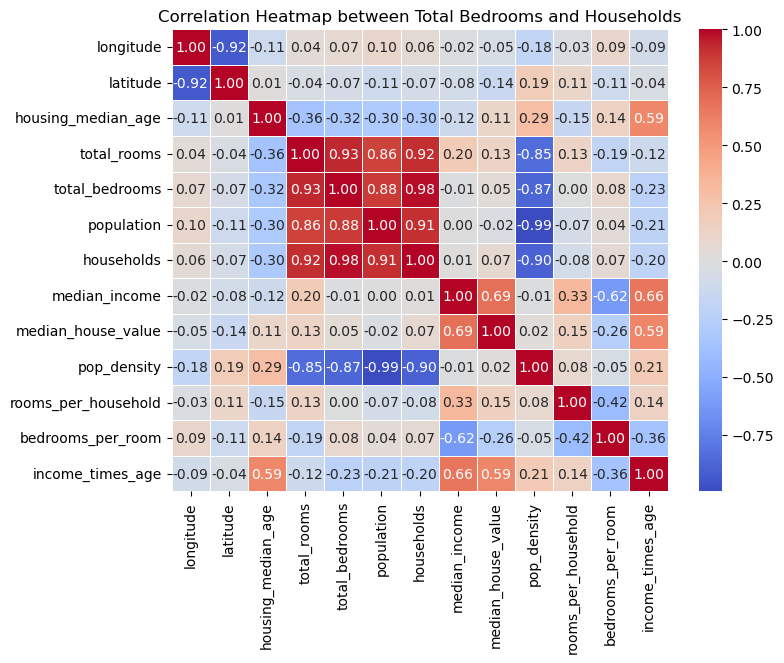

In [ ]:
#Calculate the correlation matrix
correlation_matrix = housing_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Total Bedrooms and Households')
plt.show()

## Data Cleaning

In [ ]:
housing_df.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms          207
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
pop_density               0
rooms_per_household       0
bedrooms_per_room       207
age_of_housing_stock      0
income_times_age          0
income_category           0
dtype: int64

In [ ]:
# Replace missing values in 'total_bedrooms' column with 0
housing_df_clean['total_bedrooms'] = housing_df_clean['total_bedrooms'].fillna(0)
# Replace missing values in 'total_bedrooms' column with 0
housing_df_clean['bedrooms_per_room'] = housing_df_clean['bedrooms_per_room'].fillna(0)

In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pop_density,rooms_per_household,bedrooms_per_room,income_times_age
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,-0.338258,5.429000,0.213039,108.008027
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.274467,2.474173,0.057983,74.386418
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,-9.111949,0.846154,0.100000,1.625000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,-0.411690,4.440716,0.175427,57.997425
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,-0.275038,5.229129,0.203162,92.502950
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,-0.182691,6.052381,0.239821,140.104900
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,-0.000744,141.909091,1.000000,780.005200


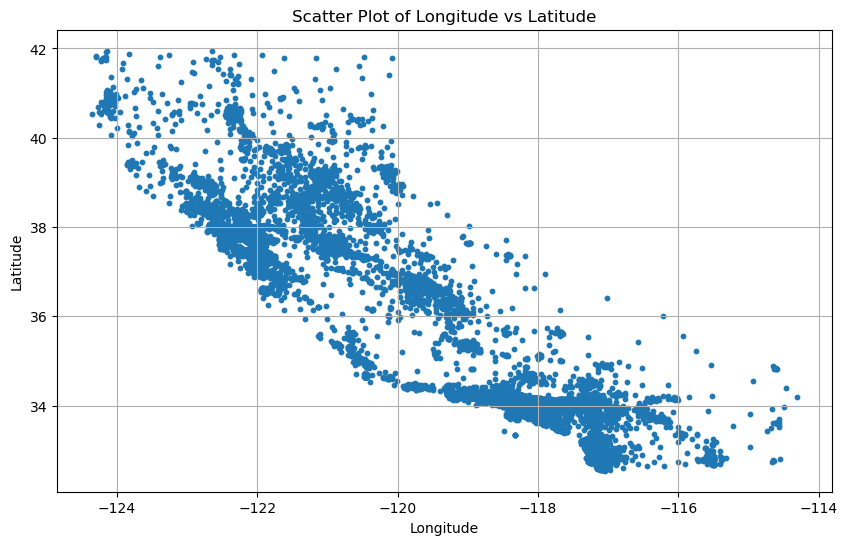

In [ ]:
# Concatenating longitude and latitude into a new column named 'coordinates'
housing_df['coordinates'] = housing_df['longitude'].astype(str) + ',' + housing_df['latitude'].astype(str)


#plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(housing_df['longitude'], housing_df['latitude'], s=10)  # s sets the size of the markers
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.grid(True)
plt.show()


# Data Preparation

In [ ]:
#Normalizing the data uning the OneHotEncoder library
one_encoder = OneHotEncoder(sparse=False)
categorical_logic = one_encoder.fit_transform(housing_df[["ocean_proximity","age_of_housing_stock","income_category"]])

In [ ]:
encoded_df = pd.DataFrame(categorical_logic, columns=one_encoder.get_feature_names_out())

In [ ]:
#combining both original dataframe and encoded data into a DataFrame
housing_df_clean = pd.concat([housing_df.drop(columns=['ocean_proximity', 'age_of_housing_stock', 'income_category']), encoded_df], axis=1)


In [ ]:
housing_df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pop_density,...,age_of_housing_stock_11-20,age_of_housing_stock_21-30,age_of_housing_stock_31-40,age_of_housing_stock_41-50,age_of_housing_stock_51+,income_category_High,income_category_Low,income_category_Lower Middle,income_category_Middle,income_category_Upper Middle
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-0.069545,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,-0.518883,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,-0.107202,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,-0.120592,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,-0.122105,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = housing_df_clean['median_house_value']

# Separate the X variable, the features
X = housing_df_clean.drop(columns=['median_house_value'])

In [ ]:
# Review the y variable Series
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [ ]:
# Review the X variable DataFrame
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,pop_density,rooms_per_household,...,age_of_housing_stock_11-20,age_of_housing_stock_21-30,age_of_housing_stock_31-40,age_of_housing_stock_41-50,age_of_housing_stock_51+,income_category_High,income_category_Low,income_category_Lower Middle,income_category_Middle,income_category_Upper Middle
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,-0.069545,6.984127,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,-0.518883,6.238137,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,-0.107202,8.288136,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,-0.120592,5.817352,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,-0.122105,6.281853,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_encoded= pd.concat([X, housing_df_clean], axis=1)

In [ ]:
X_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,pop_density,rooms_per_household,...,age_of_housing_stock_11-20,age_of_housing_stock_21-30,age_of_housing_stock_31-40,age_of_housing_stock_41-50,age_of_housing_stock_51+,income_category_High,income_category_Low,income_category_Lower Middle,income_category_Middle,income_category_Upper Middle
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,-0.069545,6.984127,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,-0.518883,6.238137,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,-0.107202,8.288136,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,-0.120592,5.817352,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,-0.122105,6.281853,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Drop duplicated columns
X_encoded= X_encoded.loc[:,~X_encoded.columns.duplicated()]


In [ ]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     20640 non-null  float64
 1   latitude                      20640 non-null  float64
 2   housing_median_age            20640 non-null  float64
 3   total_rooms                   20640 non-null  float64
 4   total_bedrooms                20640 non-null  float64
 5   population                    20640 non-null  float64
 6   households                    20640 non-null  float64
 7   median_income                 20640 non-null  float64
 8   pop_density                   20640 non-null  float64
 9   rooms_per_household           20640 non-null  float64
 10  bedrooms_per_room             20640 non-null  float64
 11  income_times_age              20640 non-null  float64
 12  ocean_proximity_<1H OCEAN     20640 non-null  float64
 13  o

In [ ]:
X_encoded.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                  0
population                      0
households                      0
median_income                   0
pop_density                     0
rooms_per_household             0
bedrooms_per_room               0
income_times_age                0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
age_of_housing_stock_0-10       0
age_of_housing_stock_11-20      0
age_of_housing_stock_21-30      0
age_of_housing_stock_31-40      0
age_of_housing_stock_41-50      0
age_of_housing_stock_51+        0
income_category_High            0
income_category_Low             0
income_category_Lower Middle    0
income_category_Middle          0
income_category_Upper Middle    0
median_house_value              0
dtype: int64

### Checking the balance of the labels variable (`y`) by using the `value_counts` function.

In [ ]:
# Check the balance of our target values using value_counts function.
y.value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

### Spliting the data into training and testing datasets by using `train_test_split`.

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=1)

---

## Creating a Linear Regression Model with the Original Data

###   Fitting a linear regression model by using the training data (`X_train` and `y_train`).

In [ ]:
# Import the LinearRegression module from SKLearn
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
# Assign a random_state parameter of 1 to the model
lin_reg_model = LinearRegression()

# Fit the model using training data
lr_model = lin_reg_model.fit(X_train, y_train)

###  Saving the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [ ]:
# Make a prediction using the testing data
testing_prediction = lr_model.predict(X_test)

testing_prediction

array([355000.,  70700., 229400., ...,  58800., 210800.,  87500.])

## Performance Evaluation using Sklearn.metrics

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, testing_prediction)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, testing_prediction)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, testing_prediction, squared=False)

# Calculate R-squared
r_squared = r2_score(y_test, testing_prediction)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


Mean Absolute Error: 5.587716886950585e-11
Mean Squared Error: 6.287211957008216e-21
Root Mean Squared Error: 7.929194131189005e-11
R-squared: 1.0


## Using ocean_proximity as the new target variable

In [ ]:
housing_df_2 = housing_df

In [ ]:
housing_df_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_density,rooms_per_household,bedrooms_per_room,age_of_housing_stock,income_times_age,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-0.069545,6.984127,0.146591,41-50,341.3332,Middle
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-0.518883,6.238137,0.155797,21-30,174.3294,Middle
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-0.107202,8.288136,0.129516,51+,377.3848,Middle
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-0.120592,5.817352,0.184458,51+,293.4412,Lower Middle
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-0.122105,6.281853,0.172096,51+,200.0024,Lower Middle


In [ ]:
# Separate the data into labels and features

# Separate the y variable, the labels
y2 = housing_df_2['ocean_proximity']

In [ ]:
encoder_target= OneHotEncoder()

In [ ]:
#encoding the target variable that is categorical
y2_encoder = encoder_target.fit_transform(y2.values.reshape(-1,1))

In [ ]:
#encoding the X variable categorical columns
one_encoder_2 = OneHotEncoder()
ocean_proximity_logic_2 = one_encoder_2.fit_transform(housing_df_2[["age_of_housing_stock","income_category"]])

In [ ]:
ocean_proximity_array = ocean_proximity_logic_2.toarray()

In [ ]:
encoded_df_2 = pd.DataFrame(ocean_proximity_array, columns=one_encoder_2.get_feature_names_out())

In [ ]:
#combining both original and encoded dataframes
housing_df_clean_2 = pd.concat([housing_df_2.drop(columns=['ocean_proximity', 'age_of_housing_stock', 'income_category']), encoded_df_2], axis=1)


In [ ]:
housing_df_clean_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pop_density,...,age_of_housing_stock_11-20,age_of_housing_stock_21-30,age_of_housing_stock_31-40,age_of_housing_stock_41-50,age_of_housing_stock_51+,income_category_High,income_category_Low,income_category_Lower Middle,income_category_Middle,income_category_Upper Middle
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-0.069545,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,-0.518883,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,-0.107202,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,-0.120592,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,-0.122105,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#cleaning the data before model deployment
housing_df_clean_2.isnull().sum()

longitude                         0
latitude                          0
housing_median_age                0
total_rooms                       0
total_bedrooms                  207
population                        0
households                        0
median_income                     0
median_house_value                0
pop_density                       0
rooms_per_household               0
bedrooms_per_room               207
income_times_age                  0
age_of_housing_stock_0-10         0
age_of_housing_stock_11-20        0
age_of_housing_stock_21-30        0
age_of_housing_stock_31-40        0
age_of_housing_stock_41-50        0
age_of_housing_stock_51+          0
income_category_High              0
income_category_Low               0
income_category_Lower Middle      0
income_category_Middle            0
income_category_Upper Middle      0
dtype: int64

In [ ]:
# Replacing missing values in 'total_bedrooms' column with 0
housing_df_clean_2['total_bedrooms'] = housing_df_clean_2['total_bedrooms'].fillna(0)
# Replacing missing values in 'total_bedrooms' column with 0
housing_df_clean_2['bedrooms_per_room'] = housing_df_clean_2['bedrooms_per_room'].fillna(0)

In [ ]:
housing_df_clean_2.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                  0
population                      0
households                      0
median_income                   0
median_house_value              0
pop_density                     0
rooms_per_household             0
bedrooms_per_room               0
income_times_age                0
age_of_housing_stock_0-10       0
age_of_housing_stock_11-20      0
age_of_housing_stock_21-30      0
age_of_housing_stock_31-40      0
age_of_housing_stock_41-50      0
age_of_housing_stock_51+        0
income_category_High            0
income_category_Low             0
income_category_Lower Middle    0
income_category_Middle          0
income_category_Upper Middle    0
dtype: int64

In [ ]:
y2.head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [ ]:
# Checking the balance of our target values using value_counts function.
y2.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing_df_clean_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pop_density,...,age_of_housing_stock_11-20,age_of_housing_stock_21-30,age_of_housing_stock_31-40,age_of_housing_stock_41-50,age_of_housing_stock_51+,income_category_High,income_category_Low,income_category_Lower Middle,income_category_Middle,income_category_Upper Middle
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-0.069545,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,-0.518883,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,-0.107202,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,-0.120592,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,-0.122105,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X2_train, X2_test, y2_train, y2_test = train_test_split(housing_df_clean_2, y2, random_state=1)

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
log_reg_model = LogisticRegression()

# Fit the model using training data
log_model = log_reg_model.fit(X2_train, y2_train)

In [ ]:
# Make a prediction using the testing data
test_prediction = log_model.predict(X2_test)

test_prediction

array(['<1H OCEAN', 'INLAND', '<1H OCEAN', ..., '<1H OCEAN', '<1H OCEAN',
       '<1H OCEAN'], dtype=object)

###  Evaluating the model’s performance by doing the following:

* Calculating the accuracy score of the model.

* Generating a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y2_test, test_prediction)

0.3199446613604458

In [ ]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y2_test, test_prediction)


In [ ]:
# Print the classification report for the model
print(cm)

[[2141  140    0    0]
 [1095  567    0    0]
 [ 531   42    0    0]
 [ 600   44    0    0]]


---

## Predicting a Logistic Regression Model with Resampled Training Data

### Using the `RandomOverSampler` module from the imbalanced-learn library to resample the data.

In [ ]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
x_oversampled, y_oversampled = ros.fit_resample(X2_train, y2_train)

In [ ]:
# Counting the distinct values of the resampled labels data
y_oversampled.value_counts()

INLAND        6855
NEAR OCEAN    6855
<1H OCEAN     6855
NEAR BAY      6855
ISLAND        6855
Name: ocean_proximity, dtype: int64

### Using the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
log_over = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
log_over.fit(x_oversampled, y_oversampled)

# Make a prediction using the testing data
y_pred_oversampled = log_over.predict(X2_test)

### Lastly Evaluating the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y2_test, y_pred_oversampled)

0.3193872035084533

In [ ]:
# Generate a confusion matrix for the model
oversampled_cm= confusion_matrix(y2_test, y_pred_oversampled)

In [ ]:
# Print the classification report for the model
print(f"Classification Report - original data")
print(classification_report(y2_test, test_prediction))
print(f"Classification Report - oversampled data")
print(classification_report(y2_test, y_pred_oversampled))

Classification Report - original data
              precision    recall  f1-score   support

   <1H OCEAN       0.49      0.94      0.64      2281
      INLAND       0.72      0.34      0.46      1662
    NEAR BAY       0.00      0.00      0.00       573
  NEAR OCEAN       0.00      0.00      0.00       644

    accuracy                           0.52      5160
   macro avg       0.30      0.32      0.28      5160
weighted avg       0.45      0.52      0.43      5160

Classification Report - oversampled data
              precision    recall  f1-score   support

   <1H OCEAN       0.56      0.48      0.52      2281
      INLAND       0.67      0.45      0.54      1662
      ISLAND       0.00      0.00      0.00         0
    NEAR BAY       0.16      0.32      0.21       573
  NEAR OCEAN       0.12      0.03      0.05       644

    accuracy                           0.40      5160
   macro avg       0.30      0.26      0.26      5160
weighted avg       0.50      0.40      0.43      516

### Based on the Classification report, the model's prediction accuracy was 52% after hypertuning to improve the model which was originally at 32% accuracy.